## Detecting Neanderthal Introgression with Deep Learning

* https://github.com/NikolayOskolkov/DeepLearningNeanderthalIntrogression/blob/master/DeepLearningNeanderthalIntrogression.ipynb

### Extract Regions of Neanderthal Introgression
Since the revolutionary draft of Neanderthal genome https://science.sciencemag.org/content/328/5979/710 paper, a few studies had been carried out to systematically establish the maps of regions of Neanderthal introgression into modern humans. Those regions had were hypothesized to have multiple functional effects related to skin color, male fertility etc.

Since both Reich and Akey did the 1000G Neanderthal Introgression calls using hg19 version of human reference genome, we downloaded the hg19 from http://hgdownload.cse.ucsc.edu/goldenPath/hg19/bigZips/ and prepared it for fast sequence extraction with samtools faidx. Let us test it and print the sequence of the SLC16A11 gene which is a gene inherited from Neandertals and known to have strong association with Type 2 Diabetes (T2D).

In [1]:
%%bash
cd ../data/bioinformatics/neandertal/
samtools faidx hg19.fa.gz chr17:6944941-6947411 | sed '1d' | tr -d '\n'

TTCAGGAAAACCCGATAAAAATTCTTTATTGGGGGAGGGGCTCAAACAAGAAAATAATCAACAAGTGGTGTCCAGAGTGGAGCCAGGGCCTCCTGGGGACAGCAAGACTGCCTGGGGAGCGGGAAGCAGCTCCCCCGTCTCTGGGGGAGGCGTGGCTGGAGGGGAGGCTGGACCACAGGAGGGCAGCGCCCTGGGCAACCCTATGTAGATGAAGCTGCCGGAGAGGATCAAAGAACCAGACAGGAGGAAAGAGGCGGTGAAGTCTCCTGTCTCATCCCTTAGGAAGCCTGAGGAGATGGGTAAGGGCATTTAGAAGCCTCGAACCCCAGGGGCAGAGGATAGTTGTAGGCAGATCTGTGAGCTCAGGTCCTTACCTGACAGGGGAGGGCCCAGGAGCCCCCCGAGGCTCATCAGCATCATCACCAGCCCTGTGGCCTGCACCACACCTCCGACGCCCACCAGCCCGGGGAGTACACCGAAAACCAGCGGGGCGTAACTCCCCGCGCTCAGCCCATAGGCCACAGCCGCGGCCAGCAGGGGACCCCCCCAGCTCTCTTCGCCGCCCACCACGGGCACCAGCCCCACCACCCACAGCCCCAGCCCAGTCAGAGCCCCGAATACGGCCAGCAGCCGCGGGAGGGGCACCCAGCCTTGGTCTGCCAGCCACCCGCAGACCAGCCGGGCGCCCGCATCCCCCATCGCAGCCACGGCCACCACCAGCGCTGCTCCGTATCCCCCCAGGCCCCGGTCTAAAGCGTGGGGAGCCAAGTGCACGTAAGGAACGAAGTACCCGCCCCCAACCAGGGCTGTGCCTAGAGCAAAGATTGAGAAGGCCCGGCGTGTGAACAGACTCAGGCCGAGGGCAGCTAGGGGACTACGCGGTGGGGCTGGGGGGTCTCCAGGAAGGACCAGGGGTAGCAGCAGGGCGCCACAGGGGGTGAGGTGGAGGGTGATCGCGCCGAGGAGGAGCAGAGCGCCCCGCCAGCCGAAAGTATCGAGA

We can also write a simple Python script that extracts sequences from the fasta-file from certain regions. Again, we extract the SLC16A11 sequance and compare it with the sequence extracted with samtools:

In [2]:
import gzip
def getfasta(chr, start, end):
    Path = '../data/bioinformatics/neandertal/'
    start_reading = 0
    line_to_print = []
    with gzip.open(Path + 'hg19.fa.gz', 'rb') as fin:
        for line in fin:
            line = line.decode('utf-8').rstrip()
            if start_reading == 1 and line[0] != '>':
                line_to_print.append(line)
            if line == '>chr' + str(chr):
                start_reading = 1
    print('\x1b[31m' + str(''.join(line_to_print)[start-1:end]) + '\x1b[0m')
getfasta(17, 6944941, 6947411)

TTCAGGAAAACCCGATAAAAATTCTTTATTGGGGGAGGGGCTCAAACAAGAAAATAATCAACAAGTGGTGTCCAGAGTGGAGCCAGGGCCTCCTGGGGACAGCAAGACTGCCTGGGGAGCGGGAAGCAGCTCCCCCGTCTCTGGGGGAGGCGTGGCTGGAGGGGAGGCTGGACCACAGGAGGGCAGCGCCCTGGGCAACCCTATGTAGATGAAGCTGCCGGAGAGGATCAAAGAACCAGACAGGAGGAAAGAGGCGGTGAAGTCTCCTGTCTCATCCCTTAGGAAGCCTGAGGAGATGGGTAAGGGCATTTAGAAGCCTCGAACCCCAGGGGCAGAGGATAGTTGTAGGCAGATCTGTGAGCTCAGGTCCTTACCTGACAGGGGAGGGCCCAGGAGCCCCCCGAGGCTCATCAGCATCATCACCAGCCCTGTGGCCTGCACCACACCTCCGACGCCCACCAGCCCGGGGAGTACACCGAAAACCAGCGGGGCGTAACTCCCCGCGCTCAGCCCATAGGCCACAGCCGCGGCCAGCAGGGGACCCCCCCAGCTCTCTTCGCCGCCCACCACGGGCACCAGCCCCACCACCCACAGCCCCAGCCCAGTCAGAGCCCCGAATACGGCCAGCAGCCGCGGGAGGGGCACCCAGCCTTGGTCTGCCAGCCACCCGCAGACCAGCCGGGCGCCCGCATCCCCCATCGCAGCCACGGCCACCACCAGCGCTGCTCCGTATCCCCCCAGGCCCCGGTCTAAAGCGTGGGGAGCCAAGTGCACGTAAGGAACGAAGTACCCGCCCCCAACCAGGGCTGTGCCTAGAGCAAAGATTGAGAAGGCCCGGCGTGTGAACAGACTCAGGCCGAGGGCAGCTAGGGGACTACGCGGTGGGGCTGGGGGGTCTCCAGGAAGGACCAGGGGTAGCAGCAGGGCGCCACAGGGGGTGAGGTGGAGGGTGATCGCGCCGAGGAGGAGCAGAGCGCCCCGCCAGCCGAAAGTATCGAGA

In [4]:
import gzip
def getfasta(chr, start, end):
    Path = '../data/bioinformatics/neandertal/'
    start_reading = 0
    line_to_print = []
    with gzip.open(Path + 'hg19.fa.gz', 'rb') as fin:
        for line in fin:
            line = line.decode('utf-8').rstrip()
            if start_reading == 1 and line[0] != '>':
                line_to_print.append(line)
            if line == '>chr' + str(chr):
                start_reading = 1
    print('\x1b[31m' + str(''.join(line_to_print)[start-1:end]) + '\x1b[0m')
getfasta(17, 6946902, 6946904)

CAT


The sequences look identical, still it is much, much faster with samtools (optimized C++ code) than with my Python implementation, so in the future for creating a fasta-file containing the Neandertal introgressed regions, we will do it via samtools faidx. Now let us turn to the Neandertal introgressed regions.

We downloaded the merged maps of Neandertal introgression for European + Asian 1000G populations published in Vernot and Akey, Science, 2014 from here https://akeylab.princeton.edu/downloads.html. Now let us read the coordinates of the introgressed regions and extract their sequences from the hg19 human genome and write the sequences in a new "introgression" fasta-file:

In [6]:
import pandas as pd
Path = '../data/bioinformatics/neandertal/'
intr_coords = pd.read_csv(Path + 'all_haplotypes_populations/all_haplotypes_populations.bed.all', 
                          header = None, sep = "\t")
intr_coords.head()

,0,1,2
0,chr1,834360,867552
1,chr1,1505425,1557644
2,chr1,1880284,1928481
3,chr1,1960388,2064958
4,chr1,2206041,2249092


In [7]:
intr_coords.shape

(6721, 3)

Let us check the distribution of the lengths of the introgressed regions, this information will be important later when we select the k paremeter for the k-mer analysis when we split the sequences ("biological text") into k-mers ("biological words"):

/home/dave/anaconda3/envs/capstone/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


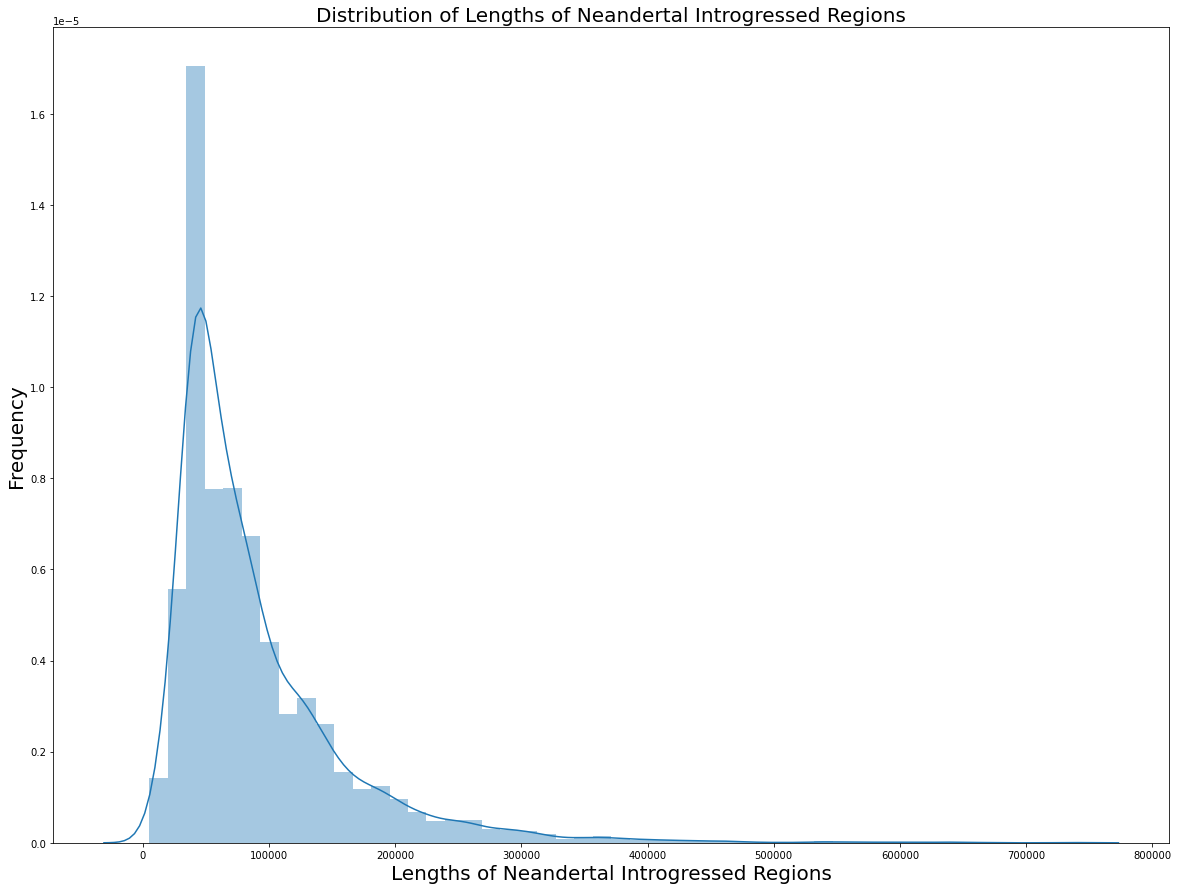

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
intr_lengths = intr_coords.iloc[:, 2]-intr_coords.iloc[:, 1]
sns.distplot(intr_lengths)
plt.title("Distribution of Lengths of Neandertal Introgressed Regions", fontsize = 20)
plt.xlabel("Lengths of Neandertal Introgressed Regions", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()

In [9]:
from scipy import stats
print(stats.describe(intr_lengths))

DescribeResult(nobs=6721, minmax=(5251, 737082), mean=89296.93021871745, variance=4886040758.3506365, skewness=2.551246218418572, kurtosis=10.205693287318592)


We can see that the minimal DNA stretch of Neanderthal introgression is around 5 kbp and the maximal is close to 1 Mbp. Nevertheless, taking into account that the inbreeding occured approximately 50 000 years ago which is equaivalent to approximately 2000 human generations ago, this would be equivalent to less than 100 kbp regions survived from Neanderthals according to the estimates of David Reich https://www.nature.com/articles/nature12961. Therefore, the DNA regions from the right tail of the distribution are highly unlikely to trully come from Neanderthals but are most likely false positives, and the DNA sequences close to the mode of the distribution should be prioritized for further analysis.

In [11]:
import os
import subprocess
os.chdir('../data/bioinformatics/neandertal/')
a = 0
with open('hg19_introgr_regions.fa', 'a') as fp:
    for i in range(intr_coords.shape[0]):
        coord = str(str(intr_coords.iloc[i, 0]) + ':' 
                    + str(intr_coords.iloc[i, 1]) + '-' + str(intr_coords.iloc[i, 2]))
        subprocess.run(['samtools', 'faidx', 'hg19.fa.gz', str(coord)], stdout = fp)
        a = a + 1
        if a%1000 == 0:
            print('Finished ' + str(a) + ' Neanderthal introgressed haplotypes')

Finished 1000 Neanderthal introgressed haplotypes
Finished 2000 Neanderthal introgressed haplotypes
Finished 3000 Neanderthal introgressed haplotypes
Finished 4000 Neanderthal introgressed haplotypes
Finished 5000 Neanderthal introgressed haplotypes
Finished 6000 Neanderthal introgressed haplotypes


It is interesting to try to make a simple k-mer analysis with kat, we downloaded and installed kat from here https://kat.readthedocs.io/en/latest/index.html and run it using the following command line:

In [ ]:
# kat hist hg19_introgr_regions.fa
# kat plot spectra-hist -x 500 kat.hist
'''
Kmer Analysis Toolkit (KAT) V2.4.2

Running KAT in HIST mode
------------------------

Input 1 is a sequence file.  Counting kmers for input 1 (hg19_introgr_regions.fa) ...
Warning: Specified hash size insufficent - attempting to double hash size... success!

Warning: Specified hash size insufficent - attempting to double hash size... success!

Warning: Specified hash size insufficent - attempting to double hash size... success!
 done.  Time taken: 517.0s

Bining kmers ... done.  Time taken: 51.8s

Merging counts ... done.  Time taken: 0.0s

Saving results to disk ... done.  Time taken: 0.0s

Creating plot ... done.  Time taken: 1.4s

Analysing peaks
---------------

Analysing distributions for: kat.hist ... done.  Time taken:  3.7s

K-mer frequency spectra statistics
----------------------------------
K-value used: 27
Peaks in analysis: 3
Global minima @ Frequency=77x (1054)
Global maxima @ Frequency=79x (1085)
Overall mean k-mer frequency: 163x

  Index    Left    Mean    Right    StdDev    Max    Volume  Description
-------  ------  ------  -------  --------  -----  --------  -------------
      1   14.41      79   143.59     32.3     306     24648  1X
      2   17.66     156   294.34     69.17    234     40154  2X
      3   30.04     395   759.96    182.48     31     10257  5X

Calculating genome statistics
-----------------------------
Assuming that homozygous peak is the largest in the spectra with frequency of: 79x
Homozygous peak index: 1
CAUTION: the following estimates are based on having a clean spectra and having identified 
the correct homozygous peak!
Estimated genome size: 0.14 Mbp

Creating plots
--------------

Plotting K-mer frequency distributions ... done.  Saved to: None


KAT HIST completed.
Total runtime: 574.5s
'''

In [ ]:
#from IPython.display import Image
#Path = '../data/bioinformatics/neandertal/'
#Image(Path + 'kat_intr-spectra-hist.png', width=2000)

### Extract Regions of Reduced Neanderthal Ancestry
Now we need a set of control sequences, i.e. a set of identical length regions extracted from the regions of depleted Neanderthal ancestry.

In [14]:
intr_coords.head()

,0,1,2
0,chr1,834360,867552
1,chr1,1505425,1557644
2,chr1,1880284,1928481
3,chr1,1960388,2064958
4,chr1,2206041,2249092


In [15]:
list(intr_lengths)[0:10]

[33192, 52219, 48197, 104570, 43051, 83170, 58798, 121590, 115844, 161767]

In [16]:
chr_sizes = pd.read_csv("hg19.fa.gz.fai", header=None, sep="\t")
chr_sizes.head()

,0,1,2,3,4
0,chr1,249250621,6,50,51
1,chr2,243199373,254235646,50,51
2,chr3,198022430,502299013,50,51
3,chr4,191154276,704281898,50,51
4,chr5,180915260,899259266,50,51


In [18]:
import numpy as np

i = 0

chr_df = intr_coords[intr_coords[0] == intr_coords[0][i]]
overlap = True
while overlap == True:
    reg_start = np.random.randint(1, int(chr_sizes[chr_sizes[0] == intr_coords[0][i]].iloc[:,1]))
    reg_end = reg_start + intr_lengths[i]
    print(reg_start)
    for j in range(chr_df.shape[0]):
        b1 = chr_df[1][j]
        b2 = chr_df[2][j]
        if (reg_start > b1 and reg_start < b2) or (reg_end > b1 and reg_end < b2):
            print(reg_start, reg_end, chr_df[1][j], chr_df[2][j])
            overlap = True
            break
        else:
            overlap = False
print(intr_coords[0][i], reg_start, reg_end)

180153167
chr1 180153167 180186359


In [19]:
chr_list = []
start_list = []
end_list = []
for i in range(intr_coords.shape[0]):
    #print(i)
    chr_df = intr_coords[intr_coords[0] == intr_coords[0][i]]
    b1 = chr_df[1][i]
    b2 = chr_df[2][i]
    overlap = True
    while overlap == True:
        reg_start = np.random.randint(1, int(chr_sizes[chr_sizes[0] == intr_coords[0][i]].iloc[:,1]))
        reg_end = reg_start + intr_lengths[i]
        #print(reg_start)
        for j in range(chr_df.shape[0]):
            if (reg_start > b1 and reg_start < b2) or (reg_end > b1 and reg_end < b2):
                #print(reg_start, reg_end, chr_df[1][j], chr_df[2][j])
                overlap = True
                break
            else:
                overlap = False
    #print(intr_coords[0][i], reg_start, reg_end)
    chr_list.append(intr_coords[0][i])
    start_list.append(reg_start)
    end_list.append(reg_end)
depl_coords = pd.DataFrame({'0': chr_list, '1': start_list, '2': end_list})
depl_coords.head()

,0,1,2
0,chr1,56622962,56656154
1,chr1,132065601,132117820
2,chr1,109948543,109996740
3,chr1,181146672,181251242
4,chr1,76960381,77003432


In [20]:
depl_coords.shape

(6721, 3)

In [21]:
intr_coords.head()

,0,1,2
0,chr1,834360,867552
1,chr1,1505425,1557644
2,chr1,1880284,1928481
3,chr1,1960388,2064958
4,chr1,2206041,2249092


In [22]:
depl_lengths = depl_coords.iloc[:, 2] - depl_coords.iloc[:, 1]

In [23]:
list(intr_lengths)[0:10]

[33192, 52219, 48197, 104570, 43051, 83170, 58798, 121590, 115844, 161767]

In [24]:
list(depl_lengths)[0:10]

[33192, 52219, 48197, 104570, 43051, 83170, 58798, 121590, 115844, 161767]

In [34]:
import os
import subprocess
#os.chdir('../data/bioinformatics/neandertal/')
with open('hg19_depl_regions.fa', 'a') as fp:
    for i in range(depl_coords.shape[0]):
        coord = str(str(depl_coords.iloc[i, 0]) + ':' 
                    + str(depl_coords.iloc[i, 1]) + '-' + str(depl_coords.iloc[i, 2]))
        subprocess.run(['samtools', 'faidx', 'hg19.fa.gz', str(coord)], stdout = fp)


[faidx] Truncated sequence: chr10:135517179-135751523
[faidx] Truncated sequence: chr2:243139867-243203682
[faidx] Truncated sequence: chr3:197930236-198079845


In [ ]:
# kat hist hg19_depl_regions.fa
'''
Kmer Analysis Toolkit (KAT) V2.4.2

Running KAT in HIST mode
------------------------

Input 1 is a sequence file.  Counting kmers for input 1 (hg19_depl_regions.fa) ...
Warning: Specified hash size insufficent - attempting to double hash size... success!

Warning: Specified hash size insufficent - attempting to double hash size... success!
 done.  Time taken: 303.3s

Bining kmers ... done.  Time taken: 61.1s

Merging counts ... done.  Time taken: 0.0s

Saving results to disk ... done.  Time taken: 0.0s

Creating plot ... done.  Time taken: 1.3s

Analysing peaks
---------------

Analysing distributions for: kat.hist ... done.  Time taken:  3.9s

K-mer frequency spectra statistics
----------------------------------
K-value used: 27
Peaks in analysis: 3
Global minima @ Frequency=68x (1358)
Global maxima @ Frequency=70x (1372)
Overall mean k-mer frequency: 146x

  Index    Left    Mean    Right    StdDev    Max    Volume  Description
-------  ------  ------  -------  --------  -----  --------  -------------
      1   13.66      70   126.34     28.17    406     28539  1X
      2   16.61     138   259.39     60.69    294     44290  2X
      3   28.38     350   671.62    160.81     38     12552  5X

Calculating genome statistics
-----------------------------
Assuming that homozygous peak is the largest in the spectra with frequency of: 70x
Homozygous peak index: 1
CAUTION: the following estimates are based on having a clean spectra and having identified the correct homozygous peak!
Estimated genome size: 0.15 Mbp

Creating plots
--------------

Plotting K-mer frequency distributions ... done.  Saved to: None


KAT HIST completed.
Total runtime: 370.1s
'''

In [ ]:
#from IPython.display import Image
#Path = '/home/nikolay/Documents/Medium/DeepLearningNeanderthalIntrogression/'
#Image(Path + 'kat_depl-spectra-hist.png', width=2000)

We do not see any different functional behavior in the k-mer spectra between Neanderthal introgressed and depleted regions. Let us plot the two spectra against each other in order to see if there are any differences:

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#intr_spectr = pd.read_csv('kat_intr.hist', header = None, comment = "#", sep = " ")
#depl_spectr = pd.read_csv('kat_depl.hist', header = None, comment = "#", sep = " ")
#plt.figure(figsize=(20,15))
#plt.plot(intr_spectr[0], intr_spectr[1], c = 'blue')
#plt.plot(depl_spectr[0], depl_spectr[1], c = 'red')
#plt.xlim(70, 400)
#plt.ylim(0, 1000)
#plt.title('K-mer Spectra of Neanderthal Introgressed and Depleted Regions', fontsize = 20)
#plt.xlabel('K-mer Multiplicity', fontsize = 20)
#plt.ylabel('Frequency', fontsize = 20)
#plt.show()

So no obvious difference between the Neanderthal introgressed and depleted regions. However, one problem we had here is high proportion of regions containing long stretches of N nucleotides, meaning sequencing or genome assembly failed for these regions, might be repetative regions. Here we count how much N-containing lines we have in the fasta-files.

In [35]:
!grep -c N hg19_introgr_regions.fa

397


In [36]:
!grep -c N hg19_depl_regions.fa

560292


### Clean Fasta-Files from N-Containing Entries
Now we are going to clean the two fasta-files, i.e. Neanderthal introgressed and depleted regions, from entries containing N nucleotides. We could have selected from the very beginning only N-free regions, but since the damage is already done, for simplicity now we just remove the corresponding entries in both fasta-files if at least one of them contains N-nucleotides. In other words, if e.g. the introgressed fasta file contains a 5 kbp stretch of nucleotides where at least one of them is N, then we delete the whole stretch in the introgressed fasta-file and the corresponding 5 kbp stretch in the depeleted fasta-file.

In [37]:
from Bio import SeqIO
i = 0
for record in SeqIO.parse('hg19_introgr_regions.fa', 'fasta'):
    upper_record = record.seq.upper()
    if 'N' in upper_record:
        i = i + 1
print(i)

i = 0
for record in SeqIO.parse('hg19_depl_regions.fa', 'fasta'):
    upper_record = record.seq.upper()
    if 'N' in upper_record:
        i = i + 1
print(i)

11
452


It looks like the introgressed fasta-file has 11 entries containing N-nucleotide while the depleted fasta-file has 505 entries containing N-nucleotide. If those entries do not overlap, we will remove 516 entries from both fasta-files and convert the nucleoties into upper case in parallel, then will write the clean fasta-files into new files. We are going to convert the rest of the 6721 - 516 = 6205 entries into k-mers, which means we are going to have plenty of training daya for running Convolutional and Recurrent Neural Networks (CNN / RNN).



In [38]:
from Bio import SeqIO
for record in SeqIO.parse('hg19_introgr_regions.fa', 'fasta'):
    upper_record = record.seq.upper()
    if 'N' in upper_record:
        print(record.id)

chr10:64300331-64407831
chr2:31608174-31709440
chr2:31803557-31906844
chr2:33021841-33109648
chr2:33120746-33165152
chr21:33082494-33158443
chr21:43243448-43329377
chr22:19004802-19283682
chr3:60165205-60298045
chr4:8790165-8819778
chr4:40187108-40307705


In [39]:
from Bio import SeqIO

intr_file = 'hg19_introgr_regions.fa'
depl_file = 'hg19_depl_regions.fa'
a = 0
i = 0
with open('hg19_introgr_clean.fa', 'a') as intr_out, open('hg19_depl_clean.fa', 'a') as depl_out:
    for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
        upper_intr = intr.seq.upper()
        upper_depl = depl.seq.upper()
        a = a + 1
        if a%1000 == 0:
            print('Finished ' + str(a) + ' entries')
        if 'N' not in str(upper_intr) and 'N' not in str(upper_depl):
            intr.seq = upper_intr
            SeqIO.write(intr, intr_out, 'fasta')
            depl.seq = upper_depl
            SeqIO.write(depl, depl_out, 'fasta')
            i = i + 1
        else:
            continue
print('We have processed ' + str(a) + ' entries and written ' + str(i) + ' entries to two fasta-files')

Finished 1000 entries
Finished 2000 entries
Finished 3000 entries
Finished 4000 entries
Finished 5000 entries
Finished 6000 entries
We have processed 6721 entries and written 6262 entries to two fasta-files


In [40]:
!grep -c N hg19_introgr_clean.fa

0


In [41]:
!grep -c N hg19_depl_clean.fa

0


### Prepare Data for Convolutional Neural Network
Now it is time to build Neanderthal intogressed vs. depleted sequences for further inputing them to the Convolutional Neural Network (CNN). For simplicity we will select all sequences of the same length equal to 5251 bp meaning the minimal length of the introgressed stretch of DNA. For this purpose we are going to cut all the sequences longer than 5251.

In [42]:
import os
from Bio import SeqIO

#os.chdir('/home/nikolay/Documents/Medium/DeepLearningNeanderthalIntrogression/')

intr_file = 'hg19_introgr_clean.fa'
depl_file = 'hg19_depl_clean.fa'

a = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    #intr_seqs.append(str(intr.seq)[0:np.min(depl_lengths)])
    #depl_seqs.append(str(depl.seq)[0:np.min(depl_lengths)])
    s_intr = str(intr.seq)[0:32]
    s_depl = str(depl.seq)[0:32]
    if s_intr.count('A')>0 and s_intr.count('C')>0 and s_intr.count('G')>0 and s_intr.count('T')>0 and \
    s_depl.count('A')>0 and s_depl.count('C')>0 and s_depl.count('G')>0 and s_depl.count('T')>0:
        intr_seqs.append(s_intr)
        depl_seqs.append(s_depl)
    a = a + 1
    if a%1000 == 0:
        print('Finished ' + str(a) + ' entries')

Finished 1000 entries
Finished 2000 entries
Finished 3000 entries
Finished 4000 entries
Finished 5000 entries
Finished 6000 entries


In [43]:
sequences = intr_seqs + depl_seqs
len(sequences)

12150

In [44]:
import numpy as np
labels = list(np.ones(len(intr_seqs))) + list(np.zeros(len(depl_seqs)))
len(labels)

12150

The next step is to organize the data into a format that can be passed into a deep learning algorithm. Most deep learning algorithms accept data in the form of vectors or matrices (or more generally, tensors). To get each DNA sequence in the form of a matrix, we use one-hot encoding, which encodes every base in a sequence in the form of a 4-dimensional vector, with a separate dimension for each base. We place a "1" in the dimension corresponding to the base found in the DNA sequence, and "0"s in all other slots. We then concatenate these 4-dimensional vectors together along the bases in the sequence to form a matrix.

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

# The LabelEncoder encodes a sequence of bases as a sequence of integers: 0, 1, 2 and 3
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature, i.e. only 01 and 1 are present in the matrix
one_hot_encoder = OneHotEncoder()   
input_features = []

for sequence in sequences:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold = 40)
#print(input_features.shape)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CTCATTTCAG ... TCCTGGGAGT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


In [46]:
one_hot_encoder = OneHotEncoder()
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [[1. 1. 1. ... 0. 0. 0.]]
One-hot encoded labels:
 [[0. 0. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 0. 0.]]


Now we are going to split the data set into train and test data sets:

In [47]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size = 0.2, random_state = 42)

In [48]:
train_features.shape

(9720, 32, 4)

In [49]:
train_labels.shape

(9720, 2)

In [50]:
test_features.shape

(2430, 32, 4)

In [51]:
test_labels.shape

(2430, 2)

Now everything is ready for the classification with Convolutional Neural Network (CNN). Here we choose a simple 1D convolutional neural network (CNN), which is commonly used in deep learning for functional genomics applications.

### Run Shallow Convolutional Neural Network
A CNN learns to recognize patterns that are generally invariant across space, by trying to match the input sequence to a number of learnable "filters" of a fixed size. In our dataset, the filters will be motifs within the DNA sequences. The CNN may then learn to combine these filters to recognize a larger structure (e.g. the presence or absence of the Neanderthal introgression site on a sequence). We will start with defining Convolutional Neural Network (CNN) model and summarize the fitting parameters of the model.

In [55]:
from keras.optimizers import gradient_descent_v2, adam_v2, adadelta_v2
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout, Embedding, Activation
from keras.models import Sequential
from keras.regularizers import l1

import warnings
warnings.filterwarnings('ignore')

model = Sequential()

model.add(Conv1D(filters = 16, kernel_size = 5, padding = 'same', kernel_initializer = 'he_uniform', 
                 input_shape = (train_features.shape[1], 4)))
model.add(Activation("relu"))
model.add(Conv1D(filters = 16, kernel_size = 5, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(8, kernel_initializer = 'he_uniform'))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

epochs = 100
lrate = 0.01
decay = lrate / epochs
sgd = gradient_descent_v2.SGD(lr = lrate, momentum = 0.9, decay = decay, nesterov = False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(lr = lrate), metrics=['binary_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 32, 16)            336       
                                                                 
 activation (Activation)     (None, 32, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 16)            1296      
                                                                 
 activation_1 (Activation)   (None, 32, 16)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 16)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16)            0         
                                                        

2022-09-20 20:24:10.877864: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now, we are ready to go ahead and train the neural network. We will further divide the training set into a training and validation set. We will train only on the reduced training set, but plot the loss curve on both the training and validation sets. Once the loss for the validation set stops improving or gets worse throughout the learning cycles, it is time to stop training because the model has already converged and may be just overfitting.

In [56]:
import warnings
warnings.filterwarnings('ignore')

history = model.fit(train_features, train_labels, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)

Epoch 1/100
243/243 [==============================] - 1s 3ms/step - loss: 0.6950 - binary_accuracy: 0.5030 - val_loss: 0.6931 - val_binary_accuracy: 0.5015
Epoch 2/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6936 - binary_accuracy: 0.4945 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 3/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6933 - binary_accuracy: 0.4947 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 4/100
243/243 [==============================] - 1s 3ms/step - loss: 0.6932 - binary_accuracy: 0.4932 - val_loss: 0.6932 - val_binary_accuracy: 0.4995
Epoch 5/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6934 - binary_accuracy: 0.4954 - val_loss: 0.6931 - val_binary_accuracy: 0.5005
Epoch 6/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6932 - binary_accuracy: 0.5008 - val_loss: 0.6933 - val_binary_accuracy: 0.4995
Epoch 7/100
243/243 [==============================] - 1s 

Epoch 53/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6857 - binary_accuracy: 0.5455 - val_loss: 0.6897 - val_binary_accuracy: 0.5350
Epoch 54/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6867 - binary_accuracy: 0.5394 - val_loss: 0.6901 - val_binary_accuracy: 0.5314
Epoch 55/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6857 - binary_accuracy: 0.5430 - val_loss: 0.6903 - val_binary_accuracy: 0.5242
Epoch 56/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6858 - binary_accuracy: 0.5427 - val_loss: 0.6902 - val_binary_accuracy: 0.5273
Epoch 57/100
243/243 [==============================] - 1s 3ms/step - loss: 0.6829 - binary_accuracy: 0.5572 - val_loss: 0.6908 - val_binary_accuracy: 0.5324
Epoch 58/100
243/243 [==============================] - 1s 2ms/step - loss: 0.6841 - binary_accuracy: 0.5486 - val_loss: 0.6902 - val_binary_accuracy: 0.5293
Epoch 59/100
243/243 [==============================

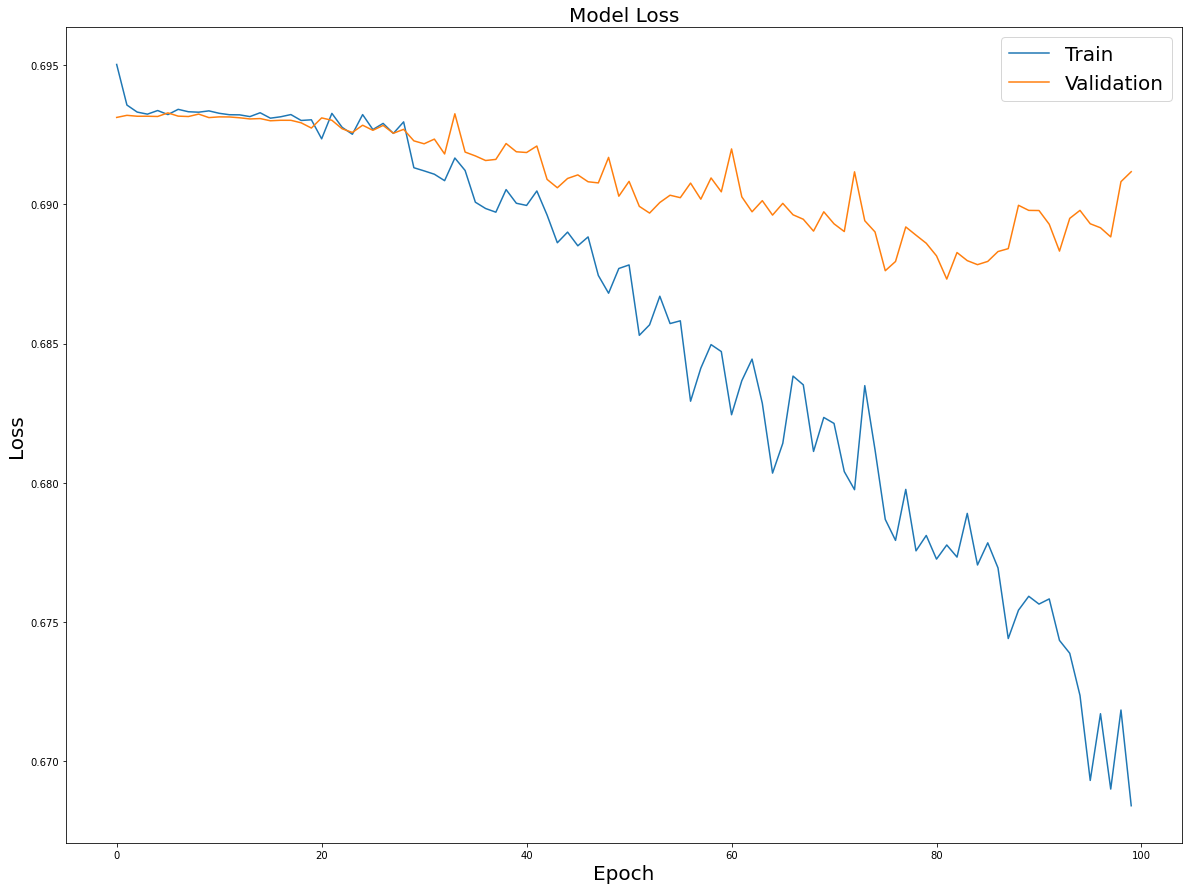

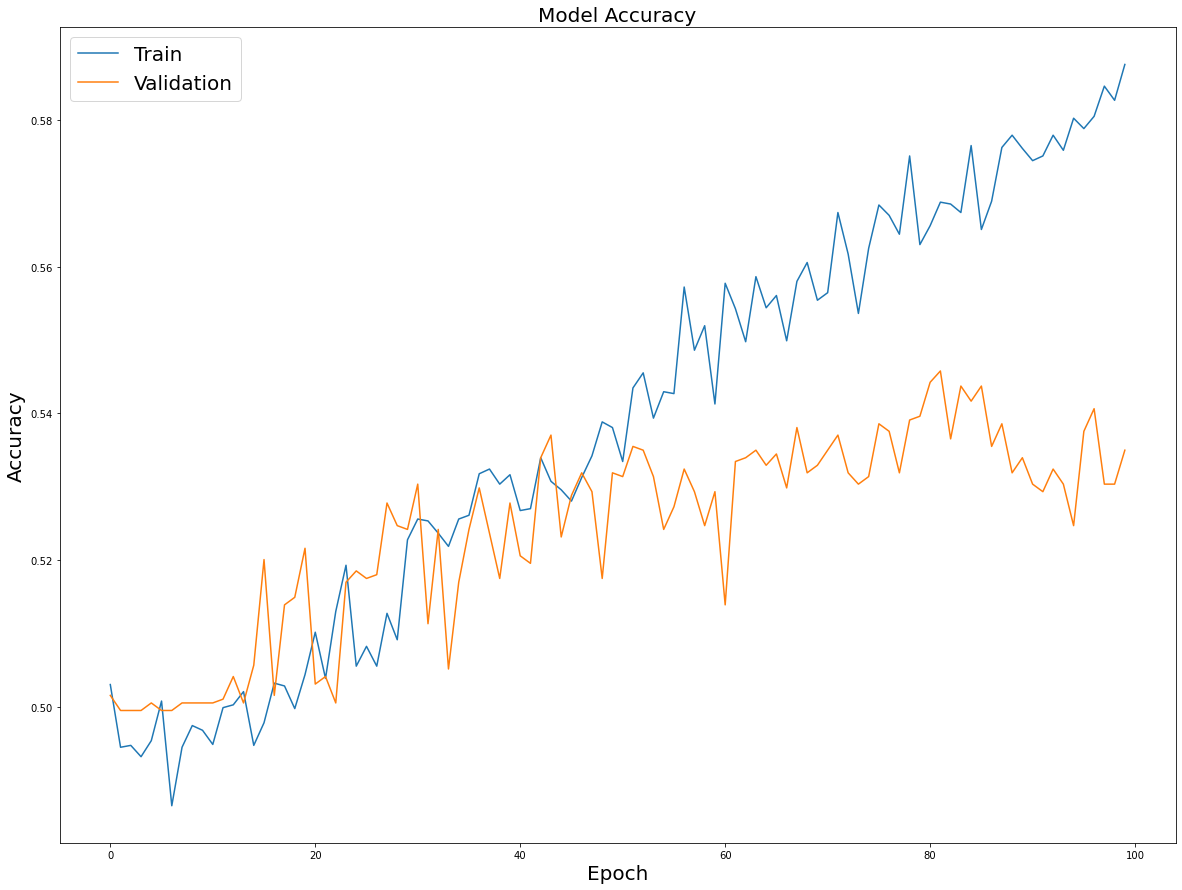

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validation'], fontsize = 20)
plt.show()

plt.figure(figsize=(20,15))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validation'], fontsize = 20)
plt.show()

The best way to evaluate whether the network has learned to classify sequences is to evaluate its performance on a fresh test set consisting of data that it has not observed at all during training. Here, we evaluate the model on the test set and plot the results as a confusion matrix.

Confusion matrix:
 [[845 374]
 [729 482]]


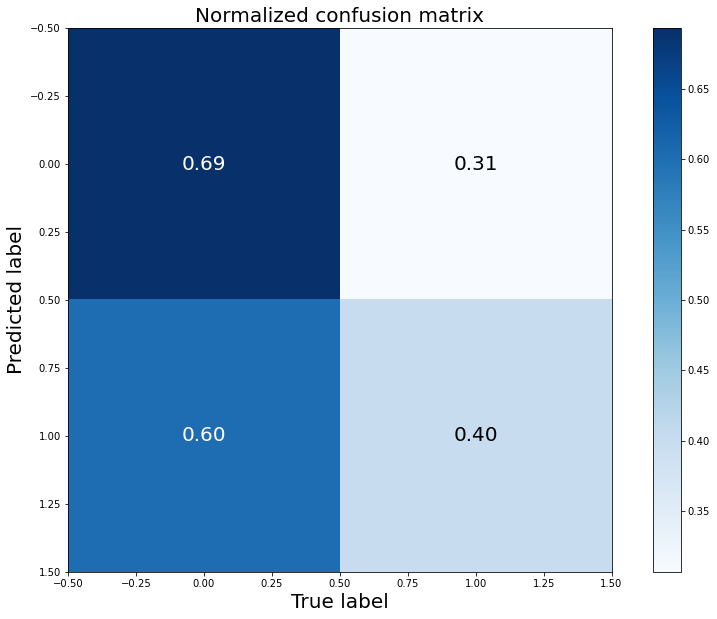

In [59]:
from sklearn.metrics import confusion_matrix
import itertools

plt.figure(figsize=(15,10))

predicted_labels = model.predict(np.stack(test_features))
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
#plt.xticks([0, 1]); plt.yticks([0, 1])
#plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [60]:
scores = model.evaluate(test_features, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 54.61%


The accuracy is not fantastic, apparently there is not enough signal in the data, i.e. Neanderthal introgressed regions look very similarly in sense of their sequence to the regions with reduced Neanderthal ancestry. This can have many reasons both biological and technical. One technical artifact can be bad annotation of the Nenanderthal introgressed regions byt Vernot and Akey, we could use David Reich's annotation as an alternative.

Let us now take a step back and simplify the problem. Let us address something simple which should be solvable within the current framework. For example we can try to classify sequences to belong either to gene or intergenic regions.



### Gene vs. Non-Gene Sequence Classification
Here we will follow roughy the same line as for Neanderthal introgressed vs. depleted sequence classification and perform a simple "sentiment analysis", i.e. a simple gene vs. non-gene sequence classification. This should be a simple task as genes have start and stop codon regions which should be recognized and learnt by CNN quite easily. We will start with building an annotation file for protein-coding genes. We downloaded RefSeq annotation file from http://genome.ucsc.edu/cgi-bin/hgTables as a text-file and used "genePredToGtf" tool to build the refGene_hg19.gtf gtf-annotation file.

In [63]:
!cut -f9 refGene_hg19.gtf | cut -d ';' -f1 | cut -d ' ' -f2 | uniq | tr -d '\"' > refseq_gene_list_hg19.txt

In [65]:
#%load_ext rpy2.ipython

In [ ]:
#%%R
#library("biomaRt")
#ensembl <- useMart("ensembl",host="grch37.ensembl.org")
#ensembl <- useDataset("hsapiens_gene_ensembl",mart=ensembl)
#refseq_genes <- scan("refseq_gene_list_hg19.txt", what = "character")
#output <- getBM(attributes=c('hgnc_symbol', 'chromosome_name', 'start_position', 'end_position', 'strand'), 
#                filters = c('hgnc_symbol'),values = refseq_genes,mart = ensembl)
#head(output)

In [68]:
import pandas as pd
#Path = '../data/bioinformatics/neandertal/'
gene_coords = pd.read_csv('gene_coords.txt', 
                          header=None, sep="\t")
gene_coords.head()

,0,1,2,3
0,chr1,11869,14362,LOC102725121
1,chr1,11874,14409,DDX11L1
2,chr1,14362,29370,WASH7P
3,chr1,17369,17436,MIR6859-1
4,chr1,17369,17436,MIR6859-2


In [69]:
gene_coords.shape

(46562, 4)

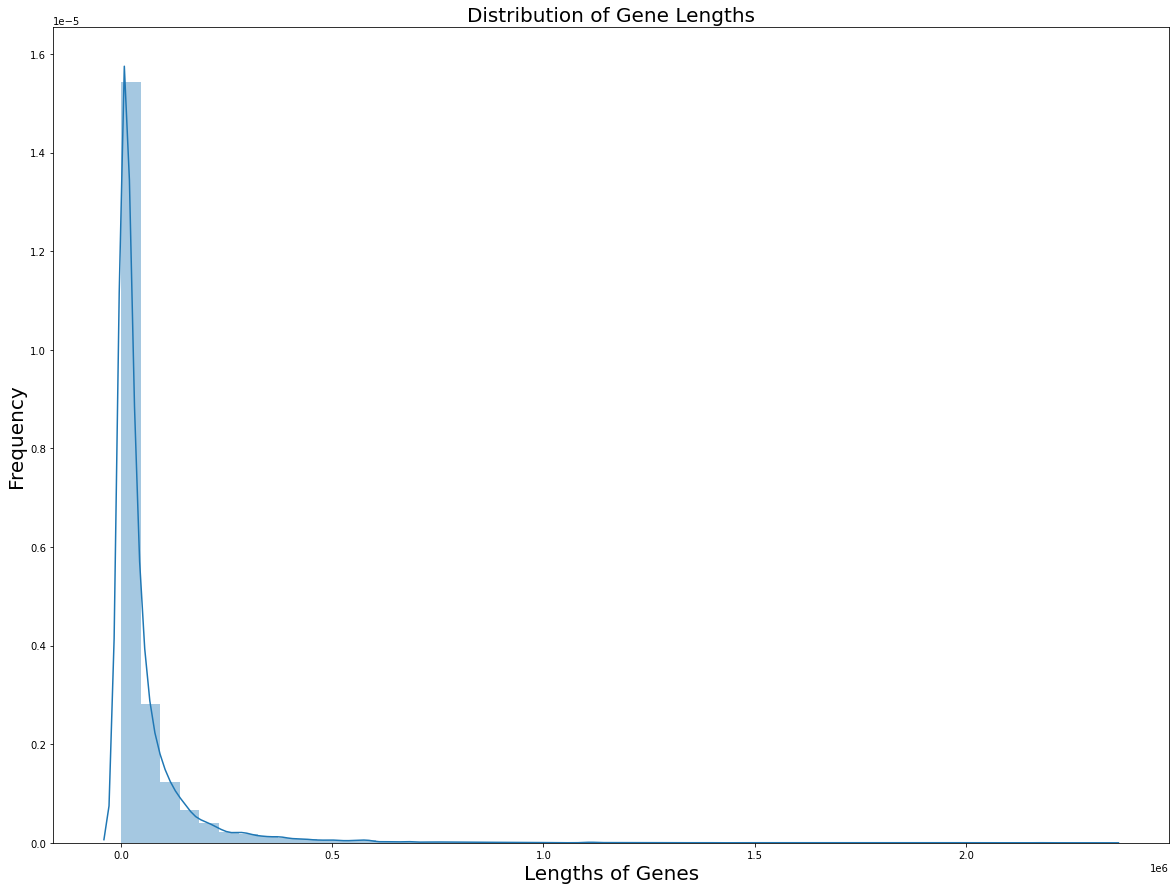

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
gene_lengths = gene_coords.iloc[:, 2]-gene_coords.iloc[:, 1]
sns.distplot(gene_lengths)
plt.title("Distribution of Gene Lengths", fontsize = 20)
plt.xlabel("Lengths of Genes", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()

In [71]:
from scipy import stats
print(stats.describe(gene_lengths))

DescribeResult(nobs=46562, minmax=(19, 2320933), mean=54794.348438640955, variance=13221560484.876678, skewness=6.624267479025657, kurtosis=72.33840831825475)


In [77]:
import os
import subprocess
#os.chdir('../data/bioinformatics/neandertal/')
with open('hg19_gene_regions.fa', 'a') as fp:
    for i in range(gene_coords.shape[0]):
        coord = str(str(gene_coords.iloc[i, 0]) + ':' 
                    + str(gene_coords.iloc[i, 1]) + '-' + str(gene_coords.iloc[i, 2]))
        subprocess.run(['samtools', 'faidx', 'hg19.fa.gz', str(coord)], stdout = fp)

In [78]:
chr_sizes = pd.read_csv("hg19.fa.gz.fai", header = None, sep = "\t")
chr_sizes.head()

,0,1,2,3,4
0,chr1,249250621,6,50,51
1,chr2,243199373,254235646,50,51
2,chr3,198022430,502299013,50,51
3,chr4,191154276,704281898,50,51
4,chr5,180915260,899259266,50,51


In [79]:
import numpy as np
chr_list = []
start_list = []
end_list = []
for i in range(gene_coords.shape[0]):
    chr_df = gene_coords[gene_coords[0] == gene_coords[0][i]]
    b1 = chr_df[1][i]
    b2 = chr_df[2][i]
    overlap = True
    while overlap == True:
        reg_start = np.random.randint(1, int(chr_sizes[chr_sizes[0] == gene_coords[0][i]].iloc[:,1]))
        reg_end = reg_start + gene_lengths[i]
        for j in range(chr_df.shape[0]):
            if (reg_start > b1 and reg_start < b2) or (reg_end > b1 and reg_end < b2):
                overlap = True
                break
            else:
                overlap = False
    chr_list.append(gene_coords[0][i])
    start_list.append(reg_start)
    end_list.append(reg_end)
notgene_coords = pd.DataFrame({'0': chr_list, '1': start_list, '2': end_list})
notgene_coords.to_csv("notgene_coords.txt", index = False, header = False, sep = "\t")
notgene_coords.head()

,0,1,2
0,chr1,91856328,91858821
1,chr1,99561316,99563851
2,chr1,102263176,102278184
3,chr1,39146601,39146668
4,chr1,11930304,11930371


In [80]:
#import os
import subprocess
#os.chdir('/home/nikolay/Documents/Medium/DeepLearningNeanderthalIntrogression/')
with open('hg19_notgene_regions.fa', 'a') as fp:
    for i in range(notgene_coords.shape[0]):
        coord = str(str(notgene_coords.iloc[i, 0]) + ':' 
                    + str(notgene_coords.iloc[i, 1]) + '-' + str(notgene_coords.iloc[i, 2]))
        subprocess.run(['samtools', 'faidx', 'hg19.fa.gz', str(coord)], stdout = fp)

[faidx] Truncated sequence: chr10:134680833-135660965
[faidx] Truncated sequence: chr12:133801961-133951853
[faidx] Truncated sequence: chr12:133838056-134015417
[faidx] Truncated sequence: chr12:133843075-133987854
[faidx] Truncated sequence: chr12:133826168-133886661
[faidx] Truncated sequence: chr13:115109951-115201410
[faidx] Truncated sequence: chr13:115144657-115741506
[faidx] Truncated sequence: chr13:115022076-115202652
[faidx] Truncated sequence: chr15:102006700-102747718
[faidx] Truncated sequence: chr15:102501012-102546799
[faidx] Truncated sequence: chr17_ctg5_hap1:1576770-1792906
[faidx] Truncated sequence: chr18:77971341-78121969
[faidx] Truncated sequence: chr19:59109117-59131879
[faidx] Truncated sequence: chr19:59128417-59156955
[faidx] Truncated sequence: chr19_gl000209_random:148824-256482
[faidx] Truncated sequence: chr19_gl000209_random:154857-164357
[faidx] Truncated sequence: chr1_gl000192_random:519682-855796
[faidx] Truncated sequence: chr2:242320954-243484038


In [81]:
!grep -c N hg19_gene_regions.fa

141245


In [82]:
!grep -c N hg19_notgene_regions.fa

2809182


In [83]:
from Bio import SeqIO
i = 0
for record in SeqIO.parse('hg19_gene_regions.fa', 'fasta'):
    upper_record = record.seq.upper()
    if 'N' in upper_record:
        i = i + 1
print(i)

i = 0
for record in SeqIO.parse('hg19_notgene_regions.fa', 'fasta'):
    upper_record = record.seq.upper()
    if 'N' in upper_record:
        i = i + 1
print(i)

145
3783


In [84]:
from Bio import SeqIO

gene_file = 'hg19_gene_regions.fa'
notgene_file = 'hg19_notgene_regions.fa'
a = 0
i = 0
with open('hg19_gene_clean.fa', 'a') as gene_out, open('hg19_notgene_clean.fa', 'a') as notgene_out:
    for gene, notgene in zip(SeqIO.parse(gene_file, 'fasta'), SeqIO.parse(notgene_file, 'fasta')):
        upper_gene = gene.seq.upper()
        upper_notgene = notgene.seq.upper()
        a = a + 1
        if a%1000 == 0:
            print('Finished ' + str(a) + ' entries')
        if 'N' not in str(upper_gene) and 'N' not in str(upper_notgene):
            gene.seq = upper_gene
            SeqIO.write(gene, gene_out, 'fasta')
            notgene.seq = upper_notgene
            SeqIO.write(notgene, notgene_out, 'fasta')
            i = i + 1
        else:
            continue
print('We have processed ' + str(a) + ' entries and written ' + str(i) + ' entries to two fasta-files')

Finished 1000 entries
Finished 2000 entries
Finished 3000 entries
Finished 4000 entries
Finished 5000 entries
Finished 6000 entries
Finished 7000 entries
Finished 8000 entries
Finished 9000 entries
Finished 10000 entries
Finished 11000 entries
Finished 12000 entries
Finished 13000 entries
Finished 14000 entries
Finished 15000 entries
Finished 16000 entries
Finished 17000 entries
Finished 18000 entries
Finished 19000 entries
Finished 20000 entries
Finished 21000 entries
Finished 22000 entries
Finished 23000 entries
Finished 24000 entries
Finished 25000 entries
Finished 26000 entries
Finished 27000 entries
Finished 28000 entries
Finished 29000 entries
Finished 30000 entries
Finished 31000 entries
Finished 32000 entries
Finished 33000 entries
Finished 34000 entries
Finished 35000 entries
Finished 36000 entries
Finished 37000 entries
Finished 38000 entries
Finished 39000 entries
Finished 40000 entries
Finished 41000 entries
Finished 42000 entries
Finished 43000 entries
Finished 44000 entri

In [85]:
!grep -c N hg19_gene_clean.fa

0


In [86]:
!grep -c N hg19_notgene_clean.fa

0


In [87]:
#import os
from Bio import SeqIO

#os.chdir('/home/nikolay/Documents/Medium/DeepLearningNeanderthalIntrogression/')

gene_file = 'hg19_gene_clean.fa'
notgene_file = 'hg19_notgene_clean.fa'

a = 0
gene_seqs = []
notgene_seqs = []
for gene, notgene in zip(SeqIO.parse(gene_file, 'fasta'), SeqIO.parse(notgene_file, 'fasta')):
    #gene_seqs.append(str(gene.seq)[0:np.min(gene_lengths)])
    #notgene_seqs.append(str(notgene.seq)[0:np.min(notgene_lengths)])
    cut = 100
    if len(str(gene.seq)) < cut or len(str(notgene.seq)) < cut:
        continue
    s_gene = str(gene.seq)[0:cut]
    s_notgene = str(notgene.seq)[0:cut]
    if s_gene.count('A')>0 and s_gene.count('C')>0 and s_gene.count('G')>0 and s_gene.count('T')>0 and \
    s_notgene.count('A')>0 and s_notgene.count('C')>0 and s_notgene.count('G')>0 and s_notgene.count('T')>0:
        gene_seqs.append(s_gene)
        notgene_seqs.append(s_notgene)
    a = a + 1
    if a%10000 == 0:
        print('Finished ' + str(a) + ' entries')

Finished 10000 entries
Finished 20000 entries
Finished 30000 entries
Finished 40000 entries
Finished 50000 entries
Finished 60000 entries
Finished 70000 entries
Finished 80000 entries
Finished 90000 entries
Finished 100000 entries
Finished 110000 entries
Finished 120000 entries
Finished 130000 entries
Finished 140000 entries


In [88]:
sequences = gene_seqs + notgene_seqs
len(sequences)

297658

In [89]:
import numpy as np
labels = list(np.ones(len(gene_seqs))) + list(np.zeros(len(notgene_seqs)))
len(labels)

297658

In [90]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

# The LabelEncoder encodes a sequence of bases as a sequence of integers: 0, 1, 2 and 3
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature, i.e. only 01 and 1 are present in the matrix
one_hot_encoder = OneHotEncoder()   
input_features = []

for sequence in sequences:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold = 40)
#print(input_features.shape)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 GTTAACTTGC ... CCGGGCCTTT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 1.]]


In [91]:
one_hot_encoder = OneHotEncoder()
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [[1. 1. 1. ... 0. 0. 0.]]
One-hot encoded labels:
 [[0. 0. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 0. 0.]]


In [92]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size = 0.2, random_state = 42)

In [93]:
train_features.shape

(238126, 100, 4)

In [94]:
train_labels.shape

(238126, 2)

In [95]:
test_features.shape

(59532, 100, 4)

In [96]:
test_labels.shape

(59532, 2)

In [98]:
from keras.optimizers import gradient_descent_v2, adam_v2, adadelta_v2
#from keras.optimizers import SGD, Adam, Adadelta
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout, Embedding, Activation
from keras.models import Sequential
from keras.regularizers import l1

import warnings
warnings.filterwarnings('ignore')

model = Sequential()

model.add(Conv1D(filters = 16, kernel_size = 5, padding = 'same', kernel_initializer = 'he_uniform', 
                 input_shape = (train_features.shape[1], 4)))
model.add(Activation("relu"))
model.add(Conv1D(filters = 16, kernel_size = 5, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(8, kernel_initializer = 'he_uniform'))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = 'softmax'))

epochs = 100
lrate = 0.01
decay = lrate / epochs
sgd = gradient_descent_v2.SGD(lr = lrate, momentum = 0.9, decay = decay, nesterov = False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=Adam(lr = lrate), metrics=['binary_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 100, 16)           336       
                                                                 
 activation_3 (Activation)   (None, 100, 16)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 16)           1296      
                                                                 
 activation_4 (Activation)   (None, 100, 16)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 50, 16)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 16)            0         
                                                      

In [99]:
import warnings
warnings.filterwarnings('ignore')

history = model.fit(train_features, train_labels, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)

2022-09-21 23:03:17.558657: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 304800000 exceeds 10% of free system memory.


Epoch 1/100
5954/5954 [==============================] - 25s 4ms/step - loss: 0.5458 - binary_accuracy: 0.7285 - val_loss: 0.4105 - val_binary_accuracy: 0.8273
Epoch 2/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4558 - binary_accuracy: 0.8046 - val_loss: 0.4008 - val_binary_accuracy: 0.8347
Epoch 3/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4425 - binary_accuracy: 0.8112 - val_loss: 0.3782 - val_binary_accuracy: 0.8378
Epoch 4/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4357 - binary_accuracy: 0.8149 - val_loss: 0.3760 - val_binary_accuracy: 0.8396
Epoch 5/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4322 - binary_accuracy: 0.8172 - val_loss: 0.3709 - val_binary_accuracy: 0.8419
Epoch 6/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4305 - binary_accuracy: 0.8189 - val_loss: 0.3713 - val_binary_accuracy: 0.8415
Epoch 7/100
5954/5954 [=================

Epoch 52/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4000 - binary_accuracy: 0.8344 - val_loss: 0.3549 - val_binary_accuracy: 0.8494
Epoch 53/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4014 - binary_accuracy: 0.8338 - val_loss: 0.3546 - val_binary_accuracy: 0.8488
Epoch 54/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4005 - binary_accuracy: 0.8340 - val_loss: 0.3542 - val_binary_accuracy: 0.8484
Epoch 55/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4014 - binary_accuracy: 0.8334 - val_loss: 0.3550 - val_binary_accuracy: 0.8500
Epoch 56/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4008 - binary_accuracy: 0.8339 - val_loss: 0.3554 - val_binary_accuracy: 0.8499
Epoch 57/100
5954/5954 [==============================] - 23s 4ms/step - loss: 0.4010 - binary_accuracy: 0.8345 - val_loss: 0.3543 - val_binary_accuracy: 0.8495
Epoch 58/100
5954/5954 [==========

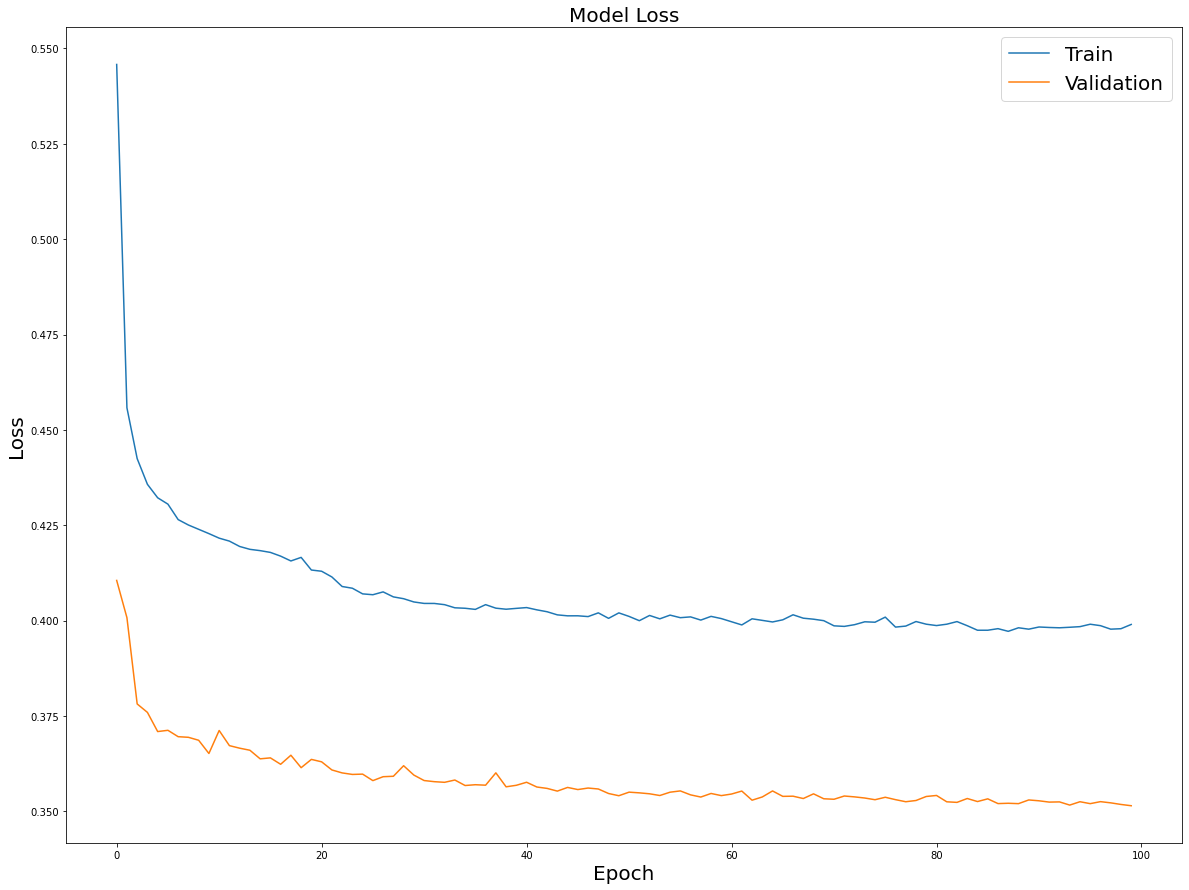

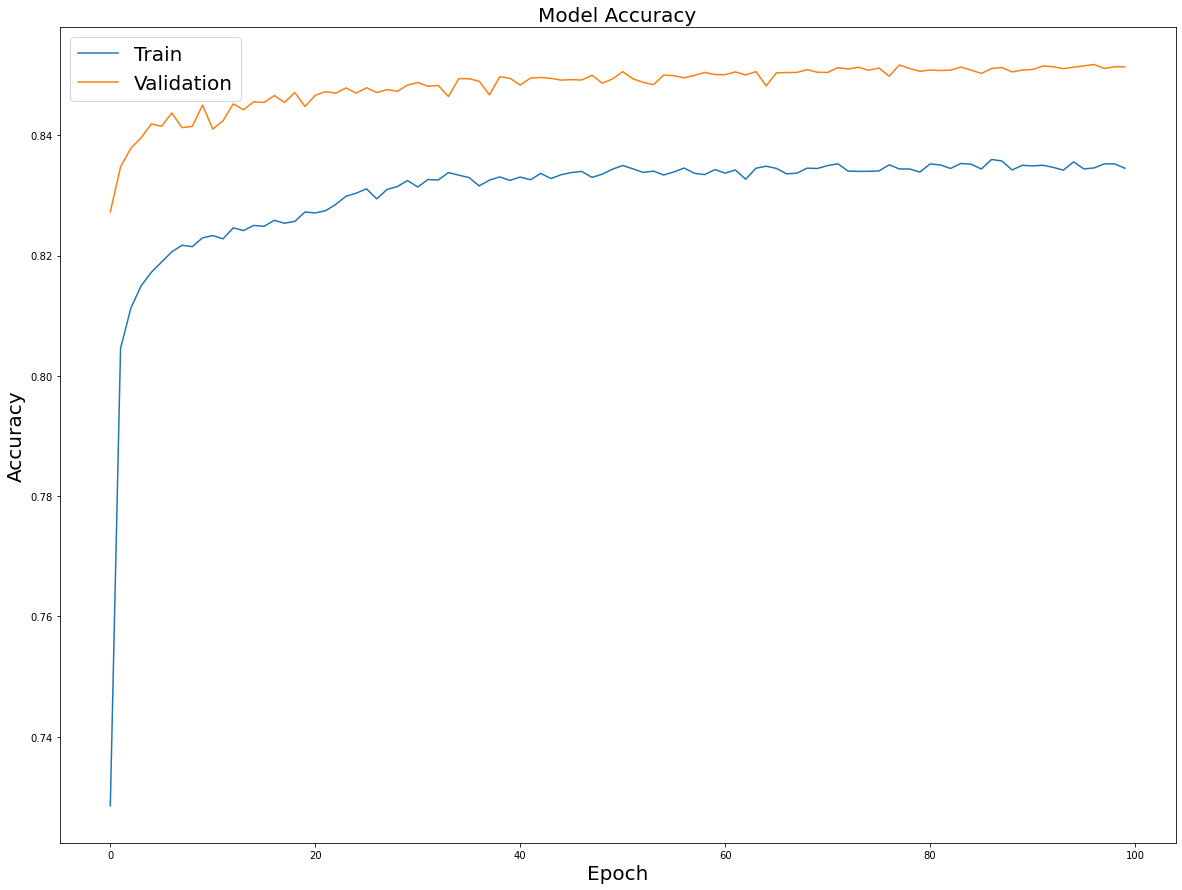

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validation'], fontsize = 20)
plt.show()

plt.figure(figsize=(20,15))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validation'], fontsize = 20)
plt.show()

Confusion matrix:
 [[26246  3566]
 [ 5715 24005]]


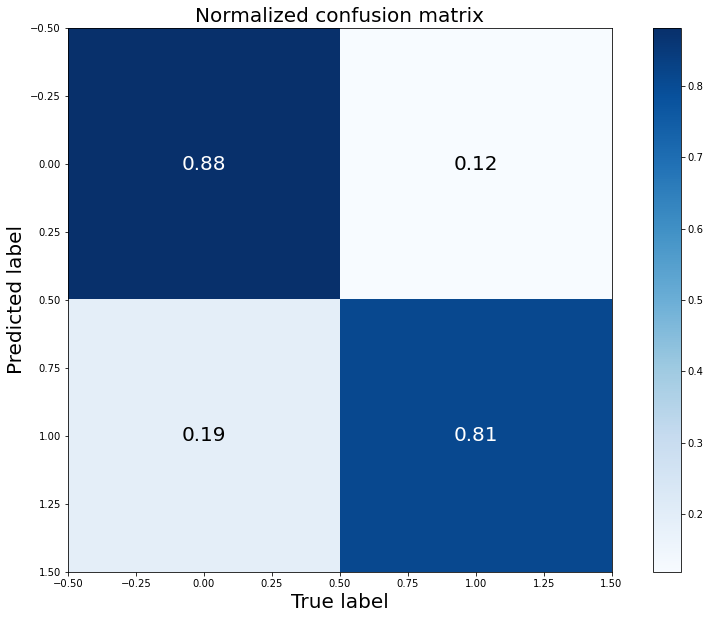

In [101]:
from sklearn.metrics import confusion_matrix
import itertools

plt.figure(figsize=(15,10))

predicted_labels = model.predict(np.stack(test_features))
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
#plt.xticks([0, 1]); plt.yticks([0, 1])
#plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [102]:
scores = model.evaluate(test_features, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2022-09-21 23:52:51.809789: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 95251200 exceeds 10% of free system memory.


Accuracy: 84.41%


In [103]:
import keras.backend as K

def compute_salient_bases(model, x):
    input_tensors = [model.input]
    gradients = model.optimizer.get_gradients(model.output[0][1], model.input)
    compute_gradients = K.function(inputs = input_tensors, outputs = gradients)
    
    x_value = np.expand_dims(x, axis=0)
    gradients = compute_gradients([x_value])[0][0]
    sal = np.clip(np.sum(np.multiply(gradients,x), axis=1),a_min=0, a_max=None)
    return sal

In [104]:
sequence_index = 2
K.set_learning_phase(1) #set learning phase
sal = compute_salient_bases(model, input_features[sequence_index])

plt.figure(figsize=[16,5])
zoom = len(sal)
barlist = plt.bar(np.arange(len(sal[0:zoom])), sal[0:zoom])
#[barlist[i].set_color('C1') for i in range(0,6)]
#[barlist[j].set_color('C1') for j in range(26,32)]
plt.xlabel('Bases')
plt.ylabel('Magnitude of saliency values')
plt.xticks(np.arange(len(sal[0:zoom])), list(sequences[sequence_index][0:zoom]), size = 6);
plt.title('Saliency map for bases in one of the sequences');
plt.show()

TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.__operators__.getitem_1/strided_slice:0', description="created by layer 'tf.__operators__.getitem_1'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.

In [106]:
input_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

This looks much much better! The model can distinguish between segments coming from genes and not genes with close to 80% accuracy, which can be probably improved by considering longer stretches of DNA. So one reason this kind of classification did not work for Neanderthal introgressed vs. depleted sequences can be due to the poor callcing / annotation provided by Vernot and Akey in their Science 2014 paper. As a prove that there is something wrong with the introgressed sequence calling from Vernot and Akey 2014, we can calculate how many times their sequences overlap the refseq genes:

In [109]:
%%bash
#ls -al all_haplotypes_populations/
#Path=../data/bioinformatics/neandertal/
bedtools intersect -a gene_coords.txt -b all_haplotypes_populations/all_haplotypes_populations.bed.all | wc -l

14681


and now let us compare this number with how many times their sequences overlap with intergenic regions:

In [110]:
%%bash
#Path=/home/nikolay/WABI/Misc/AncientDNA/NeandIntrogression/1000G_Akey_NeandIntrogression
bedtools intersect -a notgene_coords.txt -b all_haplotypes_populations/all_haplotypes_populations.bed.all | wc -l

14205


Here we see that there is at least no enrichment of the sequences in either gene or intergenic regions. In contrast, it looks like the nNeanderthal introgressed sequences seem to be slightly enriched in the gene regions which contradicts one of the main conclusions of David Reich, Nature 2014, where they explicitly state that Neanderthal sequences seem to be depleted from the gene regions, which in evolutionary context can be viewed as Natural Selection did not prefer mixing with Neanderthals for the sake of fitness. Now we will try to use the better annotation from Vernot and Akey, Science 2016, and the annotation from David Reich, Nature 2016, and redo the Neanderthal introgressed vs. depeleted sequence classification.

### Better Annotation of Neanderthal Introgressed Haplotypes
We downloaded the merged maps of Neandertal introgression for European + Asian 1000G populations published in Vernot and Akey, Science, 2014 from here https://akeylab.princeton.edu/downloads.html. However, even though the data looked strange (the segments looked too different from the ones from Reich, Nature 2014) and we could not establish any good model distinguishing between Neanderthal introgressed and depleted regions. Next we downloaded the recall data from Vernot et al., Science 2016, from here https://drive.google.com/drive/folders/0B9Pc7_zItMCVWUp6bWtXc2xJVkk. Btw here we have an opposite results of intersecting the introgressed regions with gene and non-gene regions.

In [113]:
%%bash
#Path=/home/nikolay/WABI/Misc/AncientDNA/NeandIntrogression
bedtools intersect -a gene_coords.txt -b Akey_intr_coords.bed | wc -l


160784


In [114]:
%%bash
#Path=/home/nikolay/WABI/Misc/AncientDNA/NeandIntrogression
bedtools intersect -a notgene_coords.txt -b Akey_intr_coords.bed | wc -l

173341


Here it is clear that the Neanderthal introgression regions overlap more often with the intergenic regions, i.e. the genes are depleted for Neanderthal introgression showing evolutionary losses in fitness via inbreeding of modern humans with Neanderthals. The same effect we can see with the Neanderthal introgressed regions from David Reich, 2016, after we have selected the most confident regions, i.e. with probability >=90%. Btw, Recih and colleagues provide candidate regions with probability >=50%, but to be on a safe side we select only most confident intervals.

In [ ]:
%%bash
Path=/home/nikolay/WABI/Misc/AncientDNA/NeandIntrogression
bedtools intersect -a gene_coords.txt -b $Path/Reich_intr_coords_high_conf.bed | wc -l


In [ ]:
%%bash
Path=/home/nikolay/WABI/Misc/AncientDNA/NeandIntrogression
bedtools intersect -a ./genes/notgene_coords.txt -b $Path/Reich_intr_coords_high_conf.bed | wc -l

We can also do something more intelligent and compute the empirical histogram of intersects with randomly constructed non-gene regions. In other words, we are going to create notgene_coords.txt file multiple times and run bedtools to count the number of intersects with the Neanderthal introgressed regions from Vernot and Akey, Science 2016, in this way we obtain an empirical histogram. The goal is to show that the observed number of intersects 178302 is extreme, i.e. located in the 5% tail of the histogram.

In [115]:
chr_sizes = pd.read_csv("hg19.fa.gz.fai", header = None, sep = "\t")
chr_sizes.head()


,0,1,2,3,4
0,chr1,249250621,6,50,51
1,chr2,243199373,254235646,50,51
2,chr3,198022430,502299013,50,51
3,chr4,191154276,704281898,50,51
4,chr5,180915260,899259266,50,51


In [116]:
import pandas as pd
#Path = '/home/nikolay/Documents/Medium/DeepLearningNeanderthalIntrogression/genes/'
gene_coords = pd.read_csv('gene_coords.txt', header=None, sep="\t")
gene_lengths = gene_coords.iloc[:, 2]-gene_coords.iloc[:, 1]
gene_coords.head()

,0,1,2,3
0,chr1,11869,14362,LOC102725121
1,chr1,11874,14409,DDX11L1
2,chr1,14362,29370,WASH7P
3,chr1,17369,17436,MIR6859-1
4,chr1,17369,17436,MIR6859-2


In [117]:
import os
import numpy as np
import subprocess
#os.chdir('/home/nikolay/Documents/Medium/DeepLearningNeanderthalIntrogression/')

#perm_n = []
for k in range(100):
    chr_list = []
    start_list = []
    end_list = []
    for i in range(gene_coords.shape[0]):
        chr_df = gene_coords[gene_coords[0] == gene_coords[0][i]]
        b1 = chr_df[1][i]
        b2 = chr_df[2][i]
        overlap = True
        while overlap == True:
            reg_start = np.random.randint(1, int(chr_sizes[chr_sizes[0] == gene_coords[0][i]].iloc[:,1]))
            reg_end = reg_start + gene_lengths[i]
            for j in range(chr_df.shape[0]):
                if (reg_start > b1 and reg_start < b2) or (reg_end > b1 and reg_end < b2):
                    overlap = True
                    break
                else:
                    overlap = False
        chr_list.append(gene_coords[0][i])
        start_list.append(reg_start)
        end_list.append(reg_end)
    notgene_rand_coords = pd.DataFrame({'0': chr_list, '1': start_list, '2': end_list})
    notgene_rand_coords.to_csv("temp.txt", index = False, header = False, sep = "\t")

    akey_path = '/home/nikolay/WABI/Misc/AncientDNA/NeandIntrogression/'
    with open('n.txt', 'w') as fp:
        subprocess.run(['bedtools', 'intersect', '-a', 'temp.txt', '-b', 
                        akey_path + 'Akey_intr_coords.bed'], stdout = fp)
    akey_n = pd.read_csv('n.txt', header=None, sep="\t")
    print(k, akey_n.shape[0])
    perm_n.append(akey_n.shape[0])

Error: Unable to open file /home/nikolay/WABI/Misc/AncientDNA/NeandIntrogression/Akey_intr_coords.bed. Exiting.


EmptyDataError: No columns to parse from file